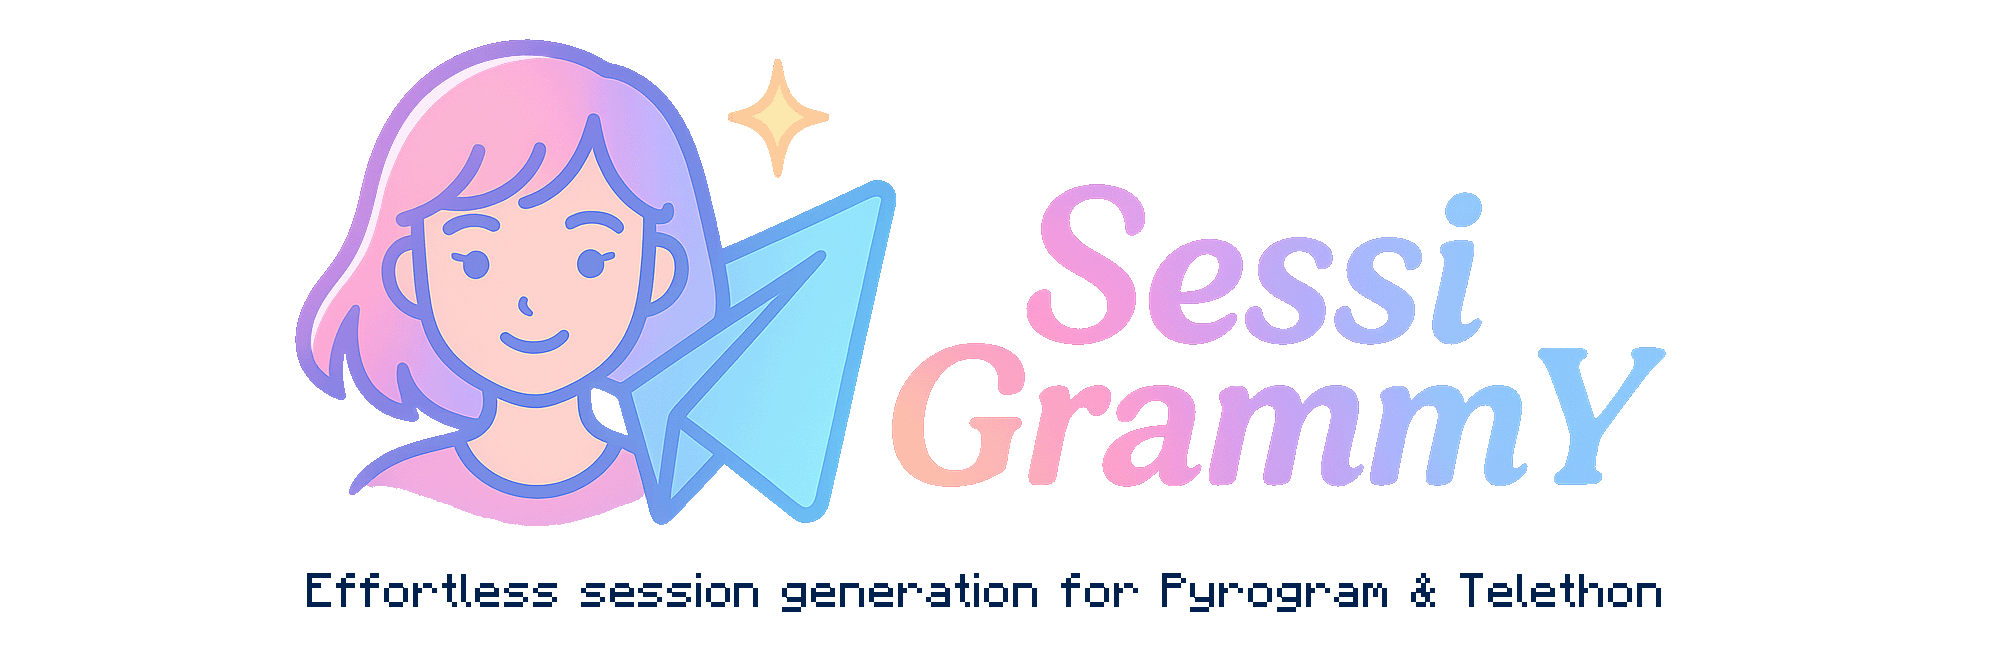

# ***1.Install, Import Libraries and Display Banner ***

Description:

This cell imports the necessary Python libraries and displays a decorative banner to introduce the session generation tool.

In [ ]:
#install required libs
from IPython import get_ipython
from IPython.display import display
!pip install telethon pyrogram

import asyncio
import os
from telethon.sync import TelegramClient
from telethon.sessions import StringSession
from telethon.errors.rpcerrorlist import (
    ApiIdInvalidError as TelethonApiIdInvalidError,
    PhoneNumberInvalidError as TelethonPhoneNumberInvalidError,
    PhoneCodeInvalidError as TelethonPhoneCodeInvalidError,
    SessionPasswordNeededError as TelethonSessionPasswordNeededError
)
from pyrogram import Client
from pyrogram.errors import (
    ApiIdInvalid as PyrogramApiIdInvalid,
    PhoneNumberInvalid as PyrogramPhoneNumberInvalid,
    PhoneCodeInvalid as PyrogramPhoneCodeInvalid,
    SessionPasswordNeeded as PyrogramSessionPasswordNeeded
)
from google.colab import files
from IPython.display import display
import ipywidgets as widgets

# Banner
banner = """
╔╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╗
╠╬╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╬╣
╠╣░█▀▀░█▀▀░█▀▀░█▀▀░▀█▀░█▀▀░█▀▄░█▀█░█▄█░█▄█░█░█╠╣
╠╣░▀▀█░█▀▀░▀▀█░▀▀█░░█░░█░█░█▀▄░█▀█░█░█░█░█░░█░╠╣
╠╣░▀▀▀░▀▀▀░▀▀▀░▀▀▀░▀▀▀░▀▀▀░▀░▀░▀░▀░▀░▀░▀░▀░░▀░╠╣
╠╣     Effortless session generation for      ╠╣
╠╣           Pyrogram & Telethon.             ╠╣
╠╣       https://github.com/ChocoJaYY         ╠╣
╠╬╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╦╬╣
╚╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╩╝
"""
print(banner)

# **2. Select Session Type**

**Description:** This cell allows you to choose between generating a session string for Telethon or Pyrogram using an interactive dropdown menu.

In [ ]:
# Function to get session choice
session_dropdown = widgets.Dropdown(
    options=[('Telethon', '1'), ('Pyrogram', '2')],
    description='Session Type:',
    disabled=False,
    layout={'width': '500px'}
)
display(session_dropdown)
print("Select Telethon or Pyrogram from the dropdown and run the next cell.")

# **3. Input API Credentials**

**Description: This cell provides text fields for entering your Telegram API ID, API Hash, and phone number.**


Instructions:

*   Enter your API ID, API Hash, and phone number in the respective text fields.
*   You can obtain API ID and Hash from [my.telegram.org](https://my.telegram.org).
*   Run this cell to display the input fields.

*   After entering your credentials, **run the next cell** to start authentication.



> **Security Note: Do not share your API credentials or phone number publicly, as Colab notebooks are not private. ALWAYS USE THIS Script in Read only mode. (Avoid Making your own ipynb copy as it saves your last state)**



In [ ]:
# Function to create text input widget
def create_text_input(description):
    return widgets.Text(
        description=description,
        layout={'width': '500px'}
    )

# Create input widgets
api_id_input = create_text_input("API ID")
api_hash_input = create_text_input("API Hash")
phone_number_input = create_text_input("Phone Number")

# Display widgets
display(api_id_input)
display(api_hash_input)
display(phone_number_input)
print("Enter your API ID, API Hash, and Phone Number (with country code). Then run the next cell.")

# **4. Authentication and Session Generation**

**Description: This cell initiates the authentication process with Telegram and requests a verification code.**

What’s Happening:



*   Uses the selected session type (Telethon or Pyrogram) and your API credentials to connect to Telegram’s servers.
*   Sends a verification code to the provided phone number.
*   Displays a text field for you to enter the code received via SMS or Telegram.
*   If authentication requires a two-factor authentication (2FA) password, it will prompt for it in the next cell.

In [ ]:
async def main():
    # Get session choice
    session_choice = session_dropdown.value
    print(f"You chose: {'Telethon' if session_choice == '1' else 'Pyrogram'}")

    # Get API credentials
    api_id_str = api_id_input.value.strip()
    if not api_id_str.isdigit():
        print("API ID must be an integer.")
        return
    api_id = int(api_id_str)
    api_hash = api_hash_input.value.strip()
    phone_number = phone_number_input.value.strip()

    if session_choice == '1':
        telethon_client = None
        session_file = "temp_session.session"

        if os.path.exists(session_file):
            try:
                os.remove(session_file)
            except Exception as e:
                print(f"Failed to delete session file: {e}")

        try:
            # Initialize TelegramClient with StringSession
            session = StringSession()
            telethon_client = TelegramClient(session, api_id, api_hash)
            await telethon_client.connect()

            # Initial authorization check
            if not await telethon_client.is_user_authorized():
                await telethon_client.send_code_request(phone_number)
                code_input = create_text_input("Code")
                display(code_input)
                print("Enter the code you received and run the next cell.")
                # Return result for next step (code input)
                return {"client": telethon_client, "code_input": code_input, "session": session}
            else:
                # If already authorized, generate session string and return None for next steps
                session_string = session.save()
                if session_string:
                    print("\nTelethon session string:")
                    print(session_string)
                    try:
                        with open("telethon_session.txt", "w") as f:
                            f.write(session_string)
                        print("Session string saved to 'telethon_session.txt'")
                        print("Downloading 'telethon_session.txt'...")
                        files.download("telethon_session.txt")
                    except Exception as e:
                        print(f"Failed to save session to file: {e}")
                else:
                    print("Failed to generate session string.")
                return None # No further steps needed
        except TelethonApiIdInvalidError:
            print("Invalid API ID or API Hash.")
        except TelethonPhoneNumberInvalidError:
            print("Invalid phone number.")
        except Exception as e:
            print(f"An error occurred: {e}")
        finally:
            # Disconnect only if the client was successfully created and connected
            if 'telethon_client' in locals() and telethon_client and telethon_client.is_connected() and not await telethon_client.is_user_authorized():
                 await telethon_client.disconnect()


    elif session_choice == '2':
        try:
            async with Client(
                name=":memory:",
                api_id=api_id,
                api_hash=api_hash,
                phone_number=phone_number,
                in_memory=True
            ) as pyrogram_client:
                # Authorization
                # Check if already authorized
                if await pyrogram_client.get_me(): # get_me() returns user info if authorized
                    print("Already authorized. Generating session string...")
                    session_string = await pyrogram_client.export_session_string()
                    if session_string:
                        print("\nPyrogram session string:")
                        print(session_string)
                        try:
                            with open("pyrogram_session.txt", "w") as f:
                                f.write(session_string)
                            print("Session string saved to 'pyrogram_session.txt'")
                            print("Downloading 'pyrogram_session.txt'...")
                            files.download("pyrogram_session.txt")
                        except Exception as e:
                            print(f"Failed to save session to file: {e}")
                    else:
                        print("Failed to generate session string.")
                    return None # No further steps needed
                else:
                    print("Sending code...")
                    sent_code_info = await pyrogram_client.send_code(phone_number)
                    code_input = create_text_input("Code")
                    display(code_input)
                    print("Enter the code you received and run the next cell.")
                    # Return result for next step (code input)
                    return {"client": pyrogram_client, "code_input": code_input, "phone_code_hash": sent_code_info.phone_code_hash}
        except PyrogramApiIdInvalid:
            print("Invalid API ID or API Hash.")
        except PyrogramPhoneNumberInvalid:
            print("Invalid phone number.")
        except Exception as e:
            print(f"An error occurred: {e}")

# Run the async main function
result = await main()

# **5. Complete Authentication**

**Description: This cell processes the verification code and handles two-factor authentication (if enabled) to generate the session string.**

Instructions:

*   Run this cell to process the session.
*   If 2FA is enabled, a password field will appear; enter your password and run the next cell.
*   If successful, the session string will be displayed, saved to a file, and downloaded automatically.

> **Security Note: Save the downloaded session file securely, as it grants access to your Telegram account.**



In [ ]:
async def complete_authentication(result):
    if not result:
        print("Previous step failed or no authentication was needed. Please start over if necessary.")
        return None # Return None if no further action is needed

    session_choice = session_dropdown.value
    # Check if 'code_input' key exists before accessing it
    if "code_input" not in result:
        print("Code input was not required in the previous step.")
        return None

    code = result["code_input"].value.strip()

    if session_choice == '1':
        telethon_client = result["client"]
        session = result["session"]
        try:
            # Only connect if not already connected
            if not telethon_client.is_connected():
                await telethon_client.connect()

            try:
                await telethon_client.sign_in(phone_number_input.value.strip(), code)
            except TelethonPhoneCodeInvalidError:
                print("Invalid code.")
                return None # Stop here if code is invalid
            except TelethonSessionPasswordNeededError:
                password_input = create_text_input("2FA Password")
                display(password_input)
                print("Two-factor authentication is enabled. Enter your password and run the next cell.")
                # Return result for next step (2FA password input)
                return {"client": telethon_client, "password_input": password_input, "session": session}

            # If sign_in was successful and no 2FA, generate session string
            if await telethon_client.is_user_authorized():
                session_string = session.save()
                if session_string:
                    print("\nTelethon session string:")
                    print("\n     ")
                    print(session_string)
                    print("\n     ")
                    print("\nNEVER SHARE THIS CODE. PLEASE DELETE THE DOWNLOADED SESSION.TXT FILE AFTER USE.")
                    print("\nIF YOU SHARE THIS CODE OR GONE FOR A WRONG HAND, YOU SCREWED.")
                    print("\nYOUR ALL DATA ON TELEGRAM INCLUDING VERY PERSONAL CHATS WILL BE EXPOSED TO THE PERSON WHO HAS YOUR SESSION STRING.")
                    print("\nTREAT YOUR SESSION STRING AS YOUR WIFE.")
                    print("\n     ")
                    try:
                        with open("telethon_session.txt", "w") as f:
                            f.write(session_string)
                        print("Session string saved to 'telethon_session.txt'")
                        print("Downloading 'telethon_session.txt'...")
                        files.download("telethon_session.txt")
                    except Exception as e:
                        print(f"Failed to save session to file: {e}")
                else:
                    print("Failed to generate session string.")
            else:
                print("Login failed or was incomplete.")
        except Exception as e:
            print(f"An error occurred: {e}")
        finally:
            # Disconnect only if the client was successfully created and is still connected
            if 'telethon_client' in locals() and telethon_client and telethon_client.is_connected():
                await telethon_client.disconnect()
        return None # Return None after successful authentication without 2FA or on error

    elif session_choice == '2':
        pyrogram_client = result["client"]
        phone_code_hash = result["phone_code_hash"]
        try:
            await pyrogram_client.sign_in(phone_number_input.value.strip(), phone_code_hash, code)
        except PyrogramPhoneCodeInvalid:
            print("Invalid code.")
            return None # Stop here if code is invalid
        except PyrogramSessionPasswordNeeded:
            password_input = create_text_input("2FA Password")
            display(password_input)
            print("Two-factor authentication is enabled. Enter your password and run the next cell.")
            # Return result for next step (2FA password input)
            return {"client": pyrogram_client, "password_input": password_input}

        # If sign_in was successful and no 2FA, export session string
        session_string = await pyrogram_client.export_session_string()
        if session_string:
            print("\nPyrogram session string:")
            print("\n     ")
            print(session_string)
            print("\n     ")
            print("\nNEVER SHARE THIS CODE. PLEASE DELETE THE DOWNLOADED SESSION.TXT FILE AFTER USE.")
            print("\nIF YOU SHARE THIS CODE OR GONE FOR A WRONG HAND, YOU SCREWED.")
            print("\nYOUR ALL DATA ON TELEGRAM INCLUDING VERY PERSONAL CHATS WILL BE EXPOSED TO THE PERSON WHO HAS YOUR SESSION STRING.")
            print("\nTREAT YOUR SESSION STRING AS YOUR WIFE.")
            print("\n     ")
            print(session_string)
            try:
                with open("pyrogram_session.txt", "w") as f:
                    f.write(session_string)
                print("Session string saved to 'pyrogram_session.txt'")
                print("Downloading 'pyrogram_session.txt'...")
                files.download("pyrogram_session.txt")
            except Exception as e:
                print(f"Failed to save session to file: {e}")
        else:
            print("Failed to generate session string.")
        return None # Return None after successful authentication without 2FA

# Run the async function and store the result for the next potential step (2FA)
result_after_code = await complete_authentication(result)



# **6. Handle Two-Factor Authentication (RUN ONLY IF YOU HAVE 2FA Enabled)**

**Description: This cell processes the two-factor authentication (2FA) password, if required, to complete the session generation.**


Instructions:

*   If 2FA was prompted in the previous cell, enter your Telegram account password in the provided text field.
*   Run this cell to complete the authentication.

*   If successful, the session string will be displayed, saved to a file, and downloaded automatically.

*   If no 2FA was required, you can skip this cell.


> **Security Note: Save the downloaded session file securely and do not share it, as it grants access to your Telegram account.**

In [ ]:
async def handle_2fa(result):
    # Check if result exists and contains the 'password_input' key
    if not result or "password_input" not in result:
        print("2FA was not required or the previous step failed. Please start over if necessary.")
        return

    session_choice = session_dropdown.value
    password = result["password_input"].value.strip()

    if session_choice == '1':
        telethon_client = result["client"]
        session = result["session"]
        try:
            # Only connect if not already connected
            if not telethon_client.is_connected():
                await telethon_client.connect()

            await telethon_client.sign_in(password=password)
            if await telethon_client.is_user_authorized():
                session_string = session.save()
                if session_string:
                    print("\nTelethon session string:")
                    print("\n     ")
                    print(session_string)
                    print("\n     ")
                    print("\nNEVER SHARE THIS CODE. PLEASE DELETE THE DOWNLOADED SESSION.TXT FILE AFTER USE.")
                    print("\nIF YOU SHARE THIS CODE OR GONE FOR A WRONG HAND, YOU SCREWED.")
                    print("\nYOUR ALL DATA ON TELEGRAM INCLUDING VERY PERSONAL CHATS WILL BE EXPOSED TO THE PERSON WHO HAS YOUR SESSION STRING.")
                    print("\nTREAT YOUR SESSION STRING AS YOUR WIFE.")
                    print("\n     ")
                    try:
                        with open("telethon_session.txt", "w") as f:
                            f.write(session_string)
                        print("Session string saved to 'telethon_session.txt'")
                        print("Downloading 'telethon_session.txt'...")
                        files.download("telethon_session.txt")
                    except Exception as e:
                        print(f"Failed to save session to file: {e}")
                else:
                    print("Failed to generate session string.")
            else:
                print("Login failed or was incomplete.")
        except Exception as e:
            print(f"Failed to complete 2FA login: {e}")
        finally:
             # Disconnect only if the client was successfully created and is still connected
            if 'telethon_client' in locals() and telethon_client and telethon_client.is_connected():
                await telethon_client.disconnect()


    elif session_choice == '2':
        pyrogram_client = result["client"]
        try:
            await pyrogram_client.check_password(password)
            session_string = await pyrogram_client.export_session_string()
            if session_string:
                print("\nPyrogram session string:")
                print("\n     ")
                print(session_string)
                print("\n     ")
                print("\nNEVER SHARE THIS CODE. PLEASE DELETE THE DOWNLOADED SESSION.TXT FILE AFTER USE.")
                print("\nIF YOU SHARE THIS CODE OR GONE FOR A WRONG HAND, YOU SCREWED.")
                print("\nYOUR ALL DATA ON TELEGRAM INCLUDING VERY PERSONAL CHATS WILL BE EXPOSED TO THE PERSON WHO HAS YOUR SESSION STRING.")
                print("\nTREAT YOUR SESSION STRING AS YOUR WIFE.")
                print("\n     ")
                try:
                    with open("pyrogram_session.txt", "w") as f:
                        f.write(session_string)
                    print("Session string saved to 'pyrogram_session.txt'")
                    print("Downloading 'pyrogram_session.txt'...")
                    files.download("pyrogram_session.txt")
                except Exception as e:
                    print(f"Failed to save session to file: {e}")
            else:
                print("Failed to generate session string.")
        except Exception as e:
            print(f"An error occurred during password check: {e}")

# Run the async function only if the previous step indicated 2FA is needed
await handle_2fa(result_after_code)